# 8. ADVANCED SQL

# 8.3. NESTED AND REPEATED DATA

# 8.3.1. COURS

## 8.3.1.1. NESTED DATA

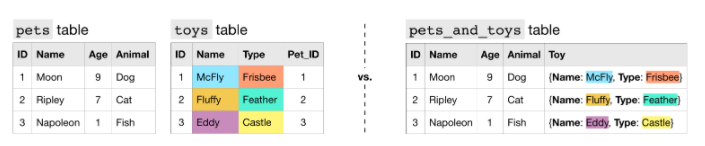

In [ ]:
# Dans ce cas, toutes les informations du tableau des jouets sont 
# regroupées dans une seule colonne (la colonne "Jouet" du tableau des 
# animaux de compagnie et des jouets). Nous appelons la colonne "Jouet" du 
# tableau "Animaux de compagnie et jouets" une colonne imbriquée, et nous 
# disons que les champs "Nom" et "Type" sont imbriqués à l'intérieur de 
# celle-ci.

In [ ]:
# Les colonnes imbriquées ont le type STRUCT (ou le type RECORD)
SchemField('Id', 'INTEGER', NULLABLE, None, ()),
SchemField('Name', 'STRING', NULLABLE, None, ()),
SchemField('Animal', 'STRING', NULLABLE, None, ()),
SchemField('Age', 'INTEGER', NULLABLE, None, ()),
SchemField('Toy', 'RECORD', NULLABLE, None, (
    SchemaField('Name', 'STRING', 'NULLABLE', None, ()),
    SchemaField('Type', 'STRING', 'NULLABLE', None, ()),
))

In [ ]:
# Pour interroger une colonne avec des données imbriquées, nous devons identifier chaque champ dans le contexte de la colonne qui le contient :
# - Toy.Name fait référence au champ "Name" de la colonne "Toy", et
# - Toy.Type fait référence au champ "Type" dans la colonne "Toy".

query = """
        SELECT Name AS Pet_Name,
               Toy.Name AS Toy_Name,
               Toy.Type AS Toy_Type
        FROM 'bigquery-public-data.pet_records.pet_and_toys'
        """

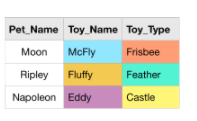

## 8.3.1.2. REPEATED DATA

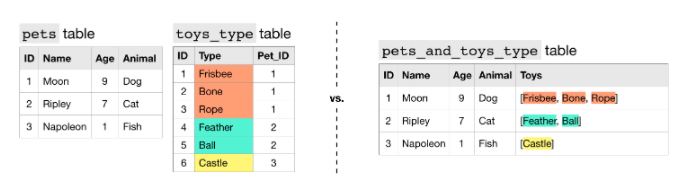

In [ ]:
# Considérons maintenant le cas (plus réaliste !) où chaque animal de 
# compagnie peut avoir plusieurs jouets. Dans ce cas, pour regrouper ces
# informations dans un seul tableau, nous devons exploiter un type de 
# données différent.

In [ ]:
# Nous disons que la colonne "Jouets" contient des données répétées, 
# car elle permet d'avoir plus d'une valeur pour chaque ligne. 
# Cela se reflète dans le schéma du tableau ci-dessous, où le mode de la 
# colonne "Jouets" apparaît comme "REPETEAD"
SchemField('Id', 'INTEGER', NULLABLE, None, ()),
SchemField('Name', 'STRING', NULLABLE, None, ()),
SchemField('Animal', 'STRING', NULLABLE, None, ()),
SchemField('Age', 'INTEGER', NULLABLE, None, ()),
SchemField('Toys', 'STRING', 'REPEATED', None, ())

In [ ]:
# Chaque entrée dans un champ répété est un ARRAY, ou une liste ordonnée de
# valeurs (zéro ou plus) avec le même type de données. Par exemple, 
# l'entrée dans la colonne "Jouets" pour Moon the Dog est [Frisbee, Bone, 
# Rope], qui est un ARRAY avec trois valeurs.
# Lors de l'interrogation de données répétées, nous devons placer le nom 
# de la colonne contenant les données répétées dans une fonction UNNEST().

query = """
        SELECT Name AS Pet_Name,
               Toy_Type
        FROM 'bigquery-public-data.pet_records.pet_and_toys_type'
            UNNEST(Toys) AS Toy_Type
        """

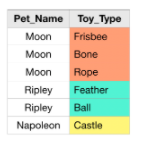

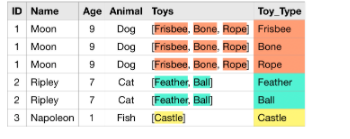

## 8.3.1.3. NESTED AND REPEATED DATA

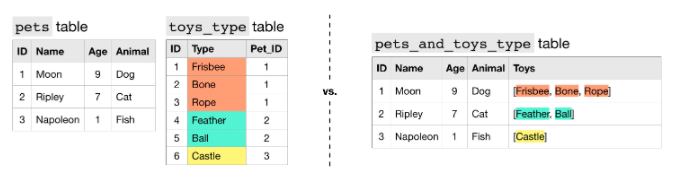

In [ ]:
# Et si les animaux domestiques pouvaient avoir plusieurs jouets et que 
# nous voulions connaître le nom et le type de chaque jouet ? Dans ce cas,
# nous pouvons faire en sorte que la colonne "Jouets" soit à la fois 
# imbriquée et répétée.
SchemField('Id', 'INTEGER', NULLABLE, None, ()),
SchemField('Name', 'STRING', NULLABLE, None, ()),
SchemField('Animal', 'STRING', NULLABLE, None, ()),
SchemField('Age', 'INTEGER', NULLABLE, None, ()),
SchemField('Toys', 'RECORD', 'REPEATED', None, (
    SchemaField('Name', 'STRING', 'NULLABLE', None, ()),
    SchemaField('Type', 'STRING', 'NULLABLE', None, ()),
))

In [ ]:
query = """
        SELECT Name AS Pet_Name,
               t.Name AS Toy_Name,
               t.Type AS Toy_Type
        FROM 'bigquery-public-data.pet_records.pet_and_toys_type'
            UNNEST(Toys) AS t
        """

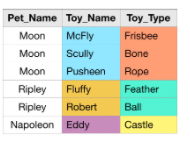

## 8.3.1.4. EXEMPLES

In [ ]:
# SCHEMA field for the 'totals' column:
    
SchemaField('totals', 'RECORD', 'NULLABLE', None, 
    (SchemaField('visits', 'INTEGER', 'NULLABLE', None, ()), 
     SchemaField('hits', 'INTEGER', 'NULLABLE', None, ()), 
     SchemaField('pageviews', 'INTEGER', 'NULLABLE', None, ()), 
     SchemaField('timeOnSite', 'INTEGER', 'NULLABLE', None, ()), 
     SchemaField('bounces', 'INTEGER', 'NULLABLE', None, ()), 
     SchemaField('transactions', 'INTEGER', 'NULLABLE', None, ()), 
     SchemaField('transactionRevenue', 'INTEGER', 'NULLABLE', None, ()), 
     SchemaField('newVisits', 'INTEGER', 'NULLABLE', None, ()), 
     SchemaField('screenviews', 'INTEGER', 'NULLABLE', None, ()), 
     SchemaField('uniqueScreenviews', 'INTEGER', 'NULLABLE', None, ()), 
     SchemaField('timeOnScreen', 'INTEGER', 'NULLABLE', None, ()), 
     SchemaField('totalTransactionRevenue', 'INTEGER', 'NULLABLE', None, ()), 
     SchemaField('sessionQualityDim', 'INTEGER', 'NULLABLE', None, ())))

# SCHEMA field for the 'device' column:
    
SchemaField('device', 'RECORD', 'NULLABLE', None, 
    (SchemaField('browser', 'STRING', 'NULLABLE', None, ()), 
     SchemaField('browserVersion', 'STRING', 'NULLABLE', None, ()), 
     SchemaField('browserSize', 'STRING', 'NULLABLE', None, ()), 
     SchemaField('operatingSystem', 'STRING', 'NULLABLE', None, ()), 
     SchemaField('operatingSystemVersion', 'STRING', 'NULLABLE', None, ()), 
     SchemaField('isMobile', 'BOOLEAN', 'NULLABLE', None, ()), 
     SchemaField('mobileDeviceBranding', 'STRING', 'NULLABLE', None, ()), 
     SchemaField('mobileDeviceModel', 'STRING', 'NULLABLE', None, ()), 
     SchemaField('mobileInputSelector', 'STRING', 'NULLABLE', None, ()), 
     SchemaField('mobileDeviceInfo', 'STRING', 'NULLABLE', None, ()), 
     SchemaField('mobileDeviceMarketingName', 'STRING', 'NULLABLE', None, ()), 
     SchemaField('flashVersion', 'STRING', 'NULLABLE', None, ()), 
     SchemaField('javaEnabled', 'BOOLEAN', 'NULLABLE', None, ()), 
     SchemaField('language', 'STRING', 'NULLABLE', None, ()), 
     SchemaField('screenColors', 'STRING', 'NULLABLE', None, ()), 
     SchemaField('screenResolution', 'STRING', 'NULLABLE', None, ()), 
     SchemaField('deviceCategory', 'STRING', 'NULLABLE', None, ())))


In [ ]:
# Query to count the number of transactions per browser
query = """
        SELECT device.browser AS device_browser,
            SUM(totals.transactions) as total_transactions
        FROM `bigquery-public-data.google_analytics_sample.ga_sessions_20170801`
        GROUP BY device_browser
        ORDER BY total_transactions DESC
        """

# Run the query, and return a pandas DataFrame
result = client.query(query).result().to_dataframe()
result.head()

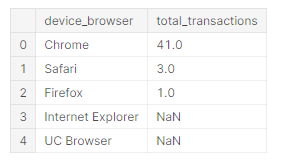

In [ ]:
# Query to determine most popular landing point on the website
query = """
        SELECT hits.page.pagePath as path,
            COUNT(hits.page.pagePath) as counts
        FROM `bigquery-public-data.google_analytics_sample.ga_sessions_20170801`, 
            UNNEST(hits) as hits
        WHERE hits.type="PAGE" and hits.hitNumber=1
        GROUP BY path
        ORDER BY counts DESC
        """

# Run the query, and return a pandas DataFrame
result = client.query(query).result().to_dataframe()
result.head()

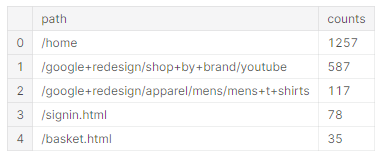

# 8.3.2. EXERCICES

## 8.3.2.1. Who had the most commits in 2016?

In [ ]:
# GitHub est l'endroit le plus populaire pour collaborer sur des projets 
# logiciels. Un dépôt GitHub (ou repo) est un ensemble de fichiers associés
# à un projet spécifique, et un commit GitHub est une modification qu'un 
# utilisateur a apportée à un dépôt. Nous appelons l'utilisateur un 
# committeur.

# Le tableau sample_commits contient un petit échantillon de commit GitHub,
# où chaque ligne correspond à un commit différent. La cellule de code
# ci-dessous récupère le tableau et affiche les cinq premières lignes de 
# ce tableau.

In [ ]:
from google.cloud import bigquery

# Create a "Client" object
client = bigquery.Client()

# Construct a reference to the "github_repos" dataset
dataset_ref = client.dataset("github_repos", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

# Construct a reference to the "sample_commits" table
table_ref = dataset_ref.table("sample_commits")

# API request - fetch the table
sample_commits_table = client.get_table(table_ref)

# Preview the first five lines of the table
client.list_rows(sample_commits_table, max_results=5).to_dataframe()

In [ ]:
# Print information on all the columns in the table
sample_commits_table.schema

In [ ]:
[SchemaField('commit', 'STRING', 'NULLABLE', None, ()),
 SchemaField('tree', 'STRING', 'NULLABLE', None, ()),
 SchemaField('parent', 'STRING', 'REPEATED', None, ()),
 SchemaField('author', 'RECORD', 'NULLABLE', None, 
    (SchemaField('name', 'STRING', 'NULLABLE', None, ()), 
     SchemaField('email', 'STRING', 'NULLABLE', None, ()), 
     SchemaField('time_sec', 'INTEGER', 'NULLABLE', None, ()), 
     SchemaField('tz_offset', 'INTEGER', 'NULLABLE', None, ()), 
     SchemaField('date', 'TIMESTAMP', 'NULLABLE', None, ()))),
 SchemaField('committer', 'RECORD', 'NULLABLE', None, 
    (SchemaField('name', 'STRING', 'NULLABLE', None, ()), 
     SchemaField('email', 'STRING', 'NULLABLE', None, ()), 
     SchemaField('time_sec', 'INTEGER', 'NULLABLE', None, ()), 
     SchemaField('tz_offset', 'INTEGER', 'NULLABLE', None, ()), 
     SchemaField('date', 'TIMESTAMP', 'NULLABLE', None, ()))),
 SchemaField('subject', 'STRING', 'NULLABLE', None, ()),
 SchemaField('message', 'STRING', 'NULLABLE', None, ()),
 SchemaField('trailer', 'RECORD', 'REPEATED', None, 
    (SchemaField('key', 'STRING', 'NULLABLE', None, ()), 
     SchemaField('value', 'STRING', 'NULLABLE', None, ()), 
     SchemaField('email', 'STRING', 'NULLABLE', None, ()))),
 SchemaField('difference', 'RECORD', 'REPEATED', None, 
    (SchemaField('old_mode', 'INTEGER', 'NULLABLE', None, ()), 
     SchemaField('new_mode', 'INTEGER', 'NULLABLE', None, ()), 
     SchemaField('old_path', 'STRING', 'NULLABLE', None, ()), 
     SchemaField('new_path', 'STRING', 'NULLABLE', None, ()), 
     SchemaField('old_sha1', 'STRING', 'NULLABLE', None, ()), 
     SchemaField('new_sha1', 'STRING', 'NULLABLE', None, ()), 
     SchemaField('old_repo', 'STRING', 'NULLABLE', None, ()), 
     SchemaField('new_repo', 'STRING', 'NULLABLE', None, ()))),
 SchemaField('difference_truncated', 'BOOLEAN', 'NULLABLE', None, ()),
 SchemaField('repo_name', 'STRING', 'NULLABLE', None, ()),
 SchemaField('encoding', 'STRING', 'NULLABLE', None, ())]

In [ ]:
# Faites une requête pour trouver les personnes ayant le plus d'engagements
# dans ce tableau en 2016. Votre requête devrait retourner un tableau à 
# deux colonnes :
#  - committer_name - contient le nom de chaque individu ayant un commit 
#    (à partir de 2016) dans la table
#  - num_commits - indique le nombre d'engagements que la personne a dans 
#    le tableau (à partir de 2016)
# Triez le tableau, de sorte que les personnes les plus engagées 
# apparaissent en premier.

# NOTE : Vous pouvez trouver le nom de chaque committer et la date du 
# commit sous la colonne "committer", dans les champs enfants "nom" et 
# "date", respectivement.

In [ ]:
# Write a query to find the answer
max_commits_query = """
                    SELECT committer.name AS committer_name, COUNT(*) AS num_commits
                    FROM `bigquery-public-data.github_repos.sample_commits`
                    WHERE committer.date >= '2016-01-01' AND committer.date < '2017-01-01'
                    GROUP BY committer_name
                    ORDER BY num_commits DESC
                    """

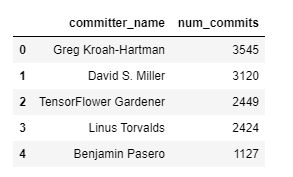

## 8.3.2.2.  Look at languages!

In [ ]:
# Construct a reference to the "languages" table
table_ref = dataset_ref.table("languages")

# API request - fetch the table
languages_table = client.get_table(table_ref)

# Preview the first five lines of the table
client.list_rows(languages_table, max_results=5).to_dataframe()

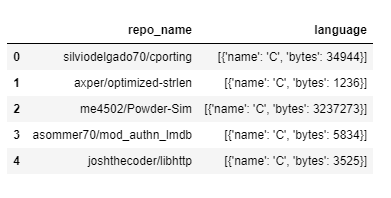

In [ ]:
# Chaque ligne du tableau des langues correspond à un référentiel différent.
#  - La colonne "repo_name" contient le nom du référentiel,
#  - le champ "nom" dans la colonne "langue" contient les langages de 
#    programmation qui peuvent être trouvés dans la pension, et
#  - le champ "octets" dans la colonne "langue" a la taille des fichiers 
# (en octets, pour la langue correspondante).

In [ ]:
# Print information on all the columns in the table
languages_table.schema

In [ ]:
[SchemaField('repo_name', 'STRING', 'NULLABLE', None, ()),
 SchemaField('language', 'RECORD', 'REPEATED', None, 
    (SchemaField('name', 'STRING', 'NULLABLE', None, ()), 
     SchemaField('bytes', 'INTEGER', 'NULLABLE', None, ())))]

In [ ]:
# How many rows are in the table returned by the query below?

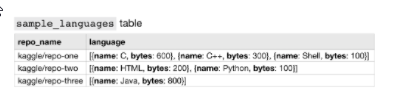

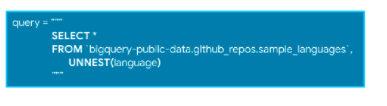

In [ ]:
# Fill in the blank
num_rows = 6

# 8.3.2.3. What's the most popular programming language?

In [ ]:
# Rédigez une requête pour exploiter les informations du tableau des 
# langues afin de déterminer quels langages de programmation apparaissent 
# dans le plus grand nombre de dépôts. Le tableau renvoyé par votre 
# requête doit comporter deux colonnes :
#  - nom_langue - le nom du langage de programmation
#  - num_repos - le nombre de dépôts dans le tableau des langues qui 
#    utilisent le langage de programmation
# Triez le tableau de manière à ce que les langues qui apparaissent dans 
# plus de dépôts soient affichées en premier.

In [ ]:
pop_lang_query = """
                 SELECT l.name as language_name, COUNT(*) as num_repos
                 FROM `bigquery-public-data.github_repos.languages`,
                     UNNEST(language) AS l
                 GROUP BY language_name
                 ORDER BY num_repos DESC
                 """

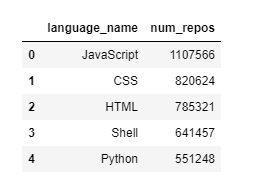

## 8.3.2.4. Which languages are used in the repository with the most languages?

In [ ]:
# Pour cette question, vous limiterez votre attention au référentiel 
# portant le nom de "polyrabbit/polyglotte".
# Ecrivez une requête qui renvoie un tableau avec une ligne pour chaque 
# langue de ce référentiel. Le tableau doit comporter deux colonnes :
#  - nom - le nom du langage de programmation
#  - octets - le nombre total d'octets de ce langage de programmation
# Triez le tableau par la colonne des octets de manière à ce que les 
# langages de programmation qui prennent le plus de place dans la pension
# apparaissent en premier.

In [ ]:
all_langs_query = """
                  SELECT l.name, l.bytes
                  FROM `bigquery-public-data.github_repos.languages`,
                      UNNEST(language) as l
                  WHERE repo_name = 'polyrabbit/polyglot'
                  ORDER BY l.bytes DESC
                  """

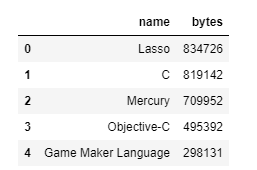